<a href="https://colab.research.google.com/github/jakubtwalczak/Muller_Guido_Introduction_to_ML/blob/main/Rozdzia%C5%82_3_Uczenie_nienadzorowane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Przetwarzanie wstępne i skalowanie.

Przetwarzanie wstępne i skalowanie są powszechnie używane w połączeniu z metodami uczenia nadzorowanego. Autorzy książki wyróżniają je wśród metod nienadzorowanego uczenia, bowiem metody skalowania nie wykorzystują informacji nadzorowanych, co sprawia, że są nienadzorowane.

Algorytmy takie, jak sieci neuronowe czy SVM, są bardzo wrażliwe na skalowanie danych, toteż stosuje się je, aby reprezentacja danych była dla tych algorytmów bardziej odpowiednia.

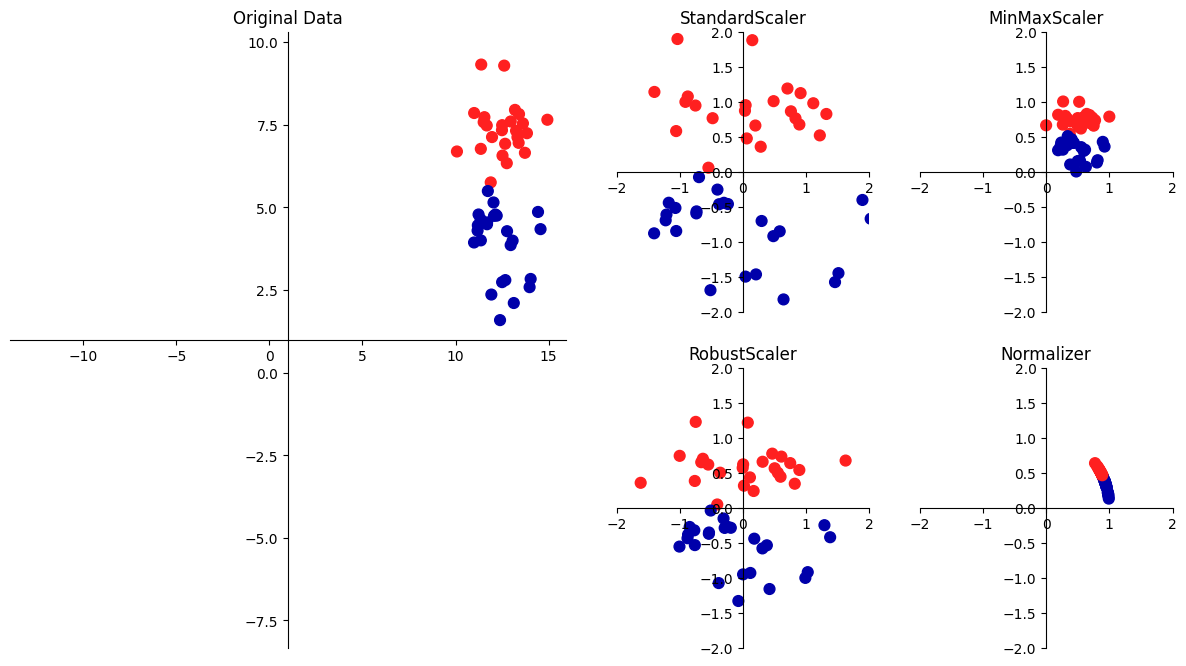

In [1]:
import mglearn

mglearn.plots.plot_scaling()

Powyżej przedstawiono syntetyczne dane dla klasyfikacji wieloklasowej z dwoma cechami: pierwsza (oś X) w przedziale 10 - 15, druga (oś Y) - 1 - 9. Dalej wykreślone są cztery różne sposoby przekształceń:
- **StandardScaler** - zapewnia, że dla każdej cechy średnia ma wartość 0, a odchylenie standardowe 1. Przekształca dane, dzieląc różnicę wartości cechy dla próbki i średniej dla cechy przez odchylenie standardowe. Skalowanie to nie zapewnia dla cechy wartości minimalnej i maksymalnej.
- **RobustScaler** - przekształca dane, dzieląc różnicę wartości cechy dla próbki i mediany dla cechy przez przedział między kwartylami (IQR; różnica między 1. i 3. kwartylem). Zapewnia tym samym medianę równą 0 i IQR równą 1 oraz odporność na wszelkie punkty odstające (outliery).
- **MinMaxScaler** - redukuje wszystkie wartości do przedziału 0 - 1. Różnicę między wartością cechy dla próbki i wartością minimalną cechy dla próbki dzieli przez różnicę między maksimum a minimum.
- **Normalizer** - skaluje każdy punkt danych w ten sposób, że wektor cech ma długość euklidesową 1 (każdy wiersz skalowany jest tak, żeby suma kwadratów jego cechy była równa 1). Dotyczy to całych obserwacji, nie tylko jednego punktu dot. cechy.

Zastosujmy zatem poznane metody do konkretnego zbioru danych - w tym wypadku ponownie **Cancer**. Skalery są zwykle używane przed zastosowaniem algorytmu uczenia nadzorowanego. W tym wypadku zastosujemy SVC w połączeniu z instancją klasy MinMaxScaler do preprocessingu, oczywiście po standardowej procedurze wstępnej w postaci załadowania danych i wydzielenia danych testowych.

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import numpy as np
np.set_printoptions(formatter={'float': '{:0.2f}'.format})

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


Ładujemy instancję skalera do danych uczących. Metoda fit oblicza minimalną i maksymalną każdej cechy danych uczących.

In [3]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

Aby jednak zastosować transformację do danych, używamy metody transform skalera.

In [4]:
X_train_scaled = scaler.transform(X_train)
print(f"Shape after scaling: {X_train_scaled.shape}")
print(f"Min value of each feature before scaling: {np.round(X_train.min(axis=0),1 )}")
print(f"Max value of each feature before scaling: {np.round(X_train.max(axis=0), 1)}")
print(f"Min value of each feature after scaling: {X_train_scaled.min(axis=0)}")
print(f"Max value of each feature after scaling: {X_train_scaled.max(axis=0)}")

Shape after scaling: (426, 30)
Min value of each feature before scaling: [7.00 9.70 43.80 143.50 0.10 0.00 0.00 0.00 0.10 0.10 0.10 0.40 0.80 6.80
 0.00 0.00 0.00 0.00 0.00 0.00 7.90 12.00 50.40 185.20 0.10 0.00 0.00 0.00
 0.20 0.10]
Max value of each feature before scaling: [28.10 39.30 188.50 2501.00 0.20 0.30 0.40 0.20 0.30 0.10 2.90 4.90 22.00
 542.20 0.00 0.10 0.40 0.10 0.10 0.00 36.00 49.50 251.20 4254.00 0.20 0.90
 1.20 0.30 0.60 0.10]
Min value of each feature after scaling: [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00]
Max value of each feature after scaling: [1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00
 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00
 1.00 1.00]


Przekształcone dane nie różnią się kształtem od oryginalnych. Zgodnie z założeniem wszystkie cechy mają jednak wartości od 0 do 1.

Aby zastosować algorytm SVC do danych przeskalowanych, musimy również przeskalować dane testowe. Do nich stosujemy jednak wyłącznie metodę transform.

In [5]:
X_test_scaled = scaler.transform(X_test)
print(f"Per-feature minimum after scaling: {X_test_scaled.min(axis=0)}")
print(f"Per-feature maximum after scaling: {X_test_scaled.max(axis=0)}")

Per-feature minimum after scaling: [0.03 0.02 0.03 0.01 0.14 0.04 0.00 0.00 0.15 -0.01 -0.00 0.01 0.00 0.00
 0.04 0.01 0.00 0.00 -0.03 0.01 0.03 0.06 0.02 0.01 0.11 0.03 0.00 0.00
 -0.00 -0.00]
Per-feature maximum after scaling: [0.96 0.82 0.96 0.89 0.81 1.22 0.88 0.93 0.93 1.04 0.43 0.50 0.44 0.28
 0.49 0.74 0.77 0.63 1.34 0.39 0.90 0.79 0.85 0.74 0.92 1.13 1.07 0.92
 1.21 1.63]


Po przeskalowaniu minima nie zawsze są równe 0, a maksima równe 1. Wyjaśnienie tego jest proste - skaler stosuje tę samą transformację dla zbioru testowego, co dla uczącego; zawsze odejmuje minimum zbioru uczącego i dzieli przez zakres zbioru uczącego, który przeważnie jest różny od testowego.

Poprawna transformacja powinna być przeprowadzona na danych uczących i treningowych po dopasowaniu wyłącznie do danych uczących. A jak wyglądałoby to, gdybyśmy użyli dla zbioru testowego minimum i zakresu tegoż zbioru?

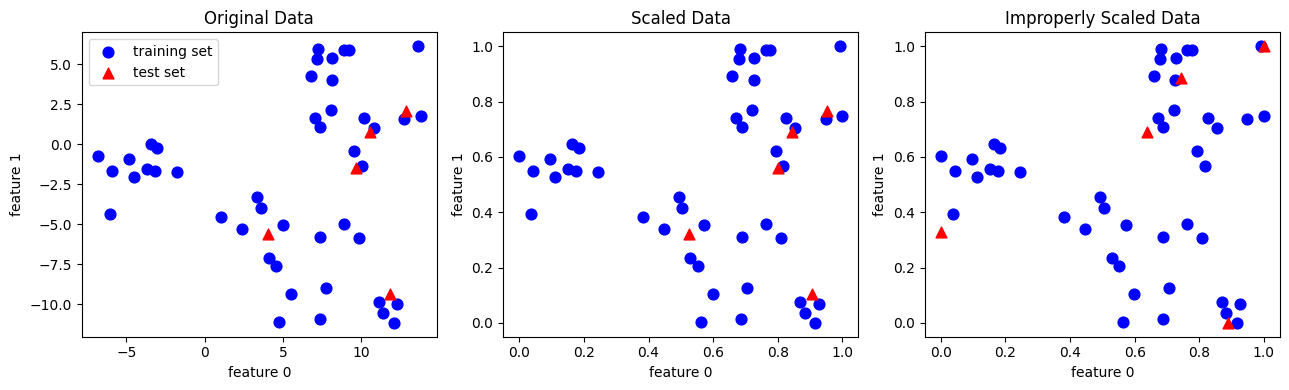

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                color='blue', label="training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                color='red', label="test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# Scaling the data with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualization of the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                color='blue', label="training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                color='red', label="test set", s=60)
axes[1].set_title("Scaled Data")

# Data scaled wrongly (don't do this!)
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# Visualization of the badly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                color='blue', label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^',
                color='red', label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
fig.tight_layout()

Na wszystkich wykres niebieskie kropki oznaczają dane treningowe, czerwone trójkąty - testowe. Pierwszy wykres z lewej przedstawia dane oryginalne, środkowy - przeskalowane MinMaxScalerem w sposób prawidłowy, wykres najbardziej na prawo - przeskalowane błędne. Zbiór danych na pierwszych dwóch wykresach wygląda identycznie, różne są tylko znaczniki na osiach; po przeskalowaniu cechy mieszczą się w przedziale 0 - 1.

Trzeci wykres pokazuje, co by się stało, gdybyśmy przeskalowali osobno dane uczące i testowe. Dane testowe też mieszczą się w przedziale 0 - 1, jednak punkty przesunęły się nieadekwatnie do zbioru uczącego z powodu innego skalowania. Taki sposób stanowi niedopuszczalną, arbitralną ingerencję w układ danych!

Ważne - wszystkie modele skalujące dane zawierają metodę fit_transform, która pozwala na dopasowanie i transformację danych jedną metodą (podobnie jak modele nadzorowane zawierają metodę fit_predict). Metoda ta niekoniecznie jest bardziej wydajna, ale jej użycie jest uznawane za dobrą praktykę.

Sprawdźmy, jak skalowanie wpływa na naukę SVC. Najpierw dopasujmy model do oryginalnych danych:

In [7]:
svm = SVC(C=100)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
svm.fit(X_train, y_train)
print(f"Test accuracy: {svm.score(X_test, y_test):.2f}")

Test accuracy: 0.94


Następnie przeskalujmy dane przy pomocy MinMaxScalera, a potem ponownie wytrenujmy model:

In [8]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print(f"Test accuracy: {svm.score(X_test_scaled, y_test):.2f}")

Test accuracy: 0.97


Efekt skalowania danych okazał się dość znaczący. Warto znać metody skalowania z Scikit-learn i je stosować, co jest znacznie lepszą praktyką niż samodzielne obliczenia (choć nie należą one do najbardziej skomplikowanych).

Dzięki temu, że wszystkie klasy skalowania mają ten sam interfejs, bardzo łatwo zastąpić jeden algorytm przetwarzania drugim, zmieniając nazwę używanej klasy:

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print(f"Test accuracy: {svm.score(X_test_scaled, y_test):.2f}")

Test accuracy: 0.97
